In [165]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score

In [166]:
df = pd.read_csv(r'../data/fake_job_postings.csv')
df.sample(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
2275,2276,Customer Service Associate,"US, WA, Redmond",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Required Qualifications:Minimum of 1 year cust...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Computer Software,Customer Service,0
7395,7396,Business Analyst,"US, NY, New York City",Operations,35-60,AREA 17 is an interactive agency. We take an i...,AREA 17 is an interactive agency located in NY...,Required Skills:1-3 years bookkeeping/financia...,Generous Health and Dental PackageMetroCard Pr...,0,1,1,Full-time,Associate,Bachelor's Degree,Internet,Accounting/Auditing,0
12354,12355,Entry Level Sales and Marketing Rep - Grand Ra...,"US, MI, Grand Rapids",Sales,50000-80000,Advocate Construction is an up and coming lead...,Are you looking for an exciting new position a...,Basic Requirements:Ability to effectively comm...,What we offer for your hard work:An excellent ...,0,1,1,Full-time,Not Applicable,High School or equivalent,Construction,Sales,0
1331,1332,Engineer - Head of Department Hydrodynamics,"NL, ,",NaN,NaN,ClarusApex is an international recruiting comp...,"Do you want to achieve independency, make good...",Educational background:HTS/TU in (Mechanical/O...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3943,3944,Python Developer,"RO, TM, Timisoara",Engineering,NaN,We are a small gaming startup based in Timisoa...,Are you passionate about games?We are too. And...,NaN,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Games,Engineering,0


In [167]:
df.shape

(17880, 18)

In [168]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [169]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [170]:
df.corr()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.079872
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.261971
has_questions,-0.087025,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.079872,0.034523,-0.261971,-0.091627,1.000000


*Decision*  
  
I have decided to completely drop the column for salary range since there is an overwhelming amount of NaN values and if I were to make a decision on how to fill them then I would be introducing a lot of bias in the data.

But before that let's check if there is a correlation between having no value for salary and fraudulent.

In [171]:
df.insert(17, "has_salary", 1)
df.loc[df['salary_range'].isna(), 'has_salary'] = 0

In [172]:
df.corr()

,job_id,telecommuting,has_company_logo,has_questions,has_salary,fraudulent
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.009231,0.079872
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.071431,0.034523
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.058141,-0.261971
has_questions,-0.087025,0.020345,0.233932,1.000000,0.005103,-0.091627
has_salary,0.009231,0.071431,-0.058141,0.005103,1.000000,0.059696
fraudulent,0.079872,0.034523,-0.261971,-0.091627,0.059696,1.000000


In [173]:
df.drop(columns='salary_range', inplace=True)

In [174]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
has_salary                 0
fraudulent                 0
dtype: int64

*Decision*  
  
I am going to fill the department NaN values with "Unspecified". Even though there are a lot of values missing I think that it could be potentially less likely for jobs that specify a department to be fraudulent. I could either treat this variable as binary ("has_department", "has_no_department"), or use "Unspecified" and then see if there is maybe another department name that is used for fraudulent jobs.

In [175]:
df['department'] = df['department'].fillna("Unspecified")

In [176]:
df.head()

,job_id,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,has_salary,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unspecified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Unspecified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0


In [177]:
df['department'].nunique()

1338

Let's see if we can make departments less unique

In [178]:
df['department'] = df['department'].str.lower()

In [179]:
df.head()

,job_id,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,has_salary,fraudulent
0,1,Marketing Intern,"US, NY, New York",marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",unspecified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",unspecified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0


In [180]:
df.loc[df['department'].str.contains('tech'), 'department'] = 'tech'
df.loc[df['department'].str.contains('it'), 'department'] = 'tech'
df.loc[df['department'].str.contains('develop'), 'department'] = 'tech'
df.loc[df['department'].str.contains('data'), 'department'] = 'tech'
df.loc[df['department'].str.contains('cs'), 'department'] = 'tech'
df.loc[df['department'].str.contains('computer'), 'department'] = 'tech'
df.loc[df['department'].str.contains('sales'), 'department'] = 'sales'
df.loc[df['department'].str.contains('eng'), 'department'] = 'engineering'
df.loc[df['department'].str.contains('client'), 'department'] = 'customer'
df.loc[df['department'].str.contains('pr'), 'department'] = 'customer'
df.loc[df['department'].str.contains('relations'), 'department'] = 'customer'
df.loc[df['department'].str.contains('customer'), 'department'] = 'customer'
df.loc[df['department'].str.contains('business'), 'department'] = 'business'
df.loc[df['department'].str.contains('financ'), 'department'] = 'finance'
df.loc[df['department'].str.contains('bank'), 'department'] = 'finance'
df.loc[df['department'].str.contains('account'), 'department'] = 'accounting'
df.loc[df['department'].str.contains('market'), 'department'] = 'marketing'

In [181]:
df['department'].nunique()

790

We have halved the departments, maybe we can work with that

In [182]:
df['title'].nunique()

11231

Maybe apply the same to titles

In [183]:
df['title'] = df['title'].str.lower()

In [184]:
df.loc[df['title'].str.contains('tech'), 'title'] = 'tech'
df.loc[df['title'].str.contains('it'), 'title'] = 'tech'
df.loc[df['title'].str.contains('develop'), 'title'] = 'tech'
df.loc[df['title'].str.contains('data'), 'title'] = 'tech'
df.loc[df['title'].str.contains('cs'), 'title'] = 'tech'
df.loc[df['title'].str.contains('computer'), 'title'] = 'tech'
df.loc[df['title'].str.contains('sales'), 'title'] = 'sales'
df.loc[df['title'].str.contains('eng'), 'title'] = 'engineering'
df.loc[df['title'].str.contains('client'), 'title'] = 'customer'
df.loc[df['title'].str.contains('pr'), 'title'] = 'customer'
df.loc[df['title'].str.contains('relations'), 'title'] = 'customer'
df.loc[df['title'].str.contains('customer'), 'title'] = 'customer'
df.loc[df['title'].str.contains('business'), 'title'] = 'business'
df.loc[df['title'].str.contains('financ'), 'title'] = 'finance'
df.loc[df['title'].str.contains('bank'), 'title'] = 'finance'
df.loc[df['title'].str.contains('account'), 'title'] = 'accounting'
df.loc[df['title'].str.contains('market'), 'title'] = 'marketing'
df.loc[df['title'].str.contains('manager'), 'title'] = 'manager'

In [185]:
df['title'].nunique()

3233

Let's recap our na values

In [186]:
df.isna().sum()

job_id                    0
title                     0
location                346
department                0
company_profile        3308
description               1
requirements           2695
benefits               7210
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
has_salary                0
fraudulent                0
dtype: int64

*Decision*  
  
I am going to fill the rows that give no location with none.

In [187]:
df['location'] = df['location'].fillna("none,")

In [188]:
df.isna().sum()

job_id                    0
title                     0
location                  0
department                0
company_profile        3308
description               1
requirements           2695
benefits               7210
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
has_salary                0
fraudulent                0
dtype: int64

Now I am going to process the location. Maybe just use the country of the location, and put in state as a second column, the existence of a state or even the state itself could be an indicator

In [189]:
df['location'] = df['location'].str.lower()
df['country'] = df[["location"]].applymap(lambda str:str.split(",")[0] if "," in str else str)
df['state'] = df[["location"]].applymap(lambda str:str.split(",")[1] if "," in str else 'none')
df.loc[df['state'] == '', 'state'] = 'none'

In [190]:
df.head()

,job_id,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,has_salary,fraudulent,country,state
0,1,marketing,"us, ny, new york",marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,0,us,ny
1,2,customer,"nz, , auckland",success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,0,nz,
2,3,commissioning machinery assistant (cma),"us, ia, wever",unspecified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,0,us,ia
3,4,accounting,"us, dc, washington",sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0,us,dc
4,5,manager,"us, fl, fort worth",unspecified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0,us,fl


In [191]:
column_to_move = df.pop("country")
df.insert(3, "country", column_to_move)
column_to_move = df.pop("state")
df.insert(4, "state", column_to_move)
df.head()

,job_id,title,location,country,state,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,has_salary,fraudulent
0,1,marketing,"us, ny, new york",us,ny,marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,0
1,2,customer,"nz, , auckland",nz,,success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,0
2,3,commissioning machinery assistant (cma),"us, ia, wever",us,ia,unspecified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,0
3,4,accounting,"us, dc, washington",us,dc,sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0
4,5,manager,"us, fl, fort worth",us,fl,unspecified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0


In [192]:
df.isna().sum()

job_id                    0
title                     0
location                  0
country                   0
state                     0
department                0
company_profile        3308
description               1
requirements           2695
benefits               7210
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
has_salary                0
fraudulent                0
dtype: int64

In [193]:
df['country'].nunique()

91

In [194]:
df['state'].nunique()

326

I am going to just drop the location column now and use the country and state instead.

In [195]:
df.drop(columns=['location'], inplace=True)

*Decision*  
  
I will filter the requirements column and see if some keywords appear that I would expect in a real job posting. Words like "experience", "years", "requirements", "qualifications", "must", "degree", "bachelor", "skill". I will then use a binary column to indicate whether one or multiple of these words were present in the description.

In [196]:
df.insert(7, "has_reqs", 0)

In [197]:
df.loc[df['requirements'].str.contains('exp') | df['requirements'].str.contains('year') | df['requirements'].str.contains('qualif') |
       df['requirements'].str.contains('must') | df['requirements'].str.contains('degree') | df['requirements'].str.contains('bachelor') |
       df['requirements'].str.contains('master') | df['requirements'].str.contains('skill'), 'has_reqs'] = 1

In [198]:
df.corr()

,job_id,has_reqs,telecommuting,has_company_logo,has_questions,has_salary,fraudulent
job_id,1.000000,-0.043293,-0.004559,-0.014539,-0.087025,0.009231,0.079872
has_reqs,-0.043293,1.000000,-0.016096,0.240892,0.185417,0.017069,-0.062734
telecommuting,-0.004559,-0.016096,1.000000,-0.019836,0.020345,0.071431,0.034523
has_company_logo,-0.014539,0.240892,-0.019836,1.000000,0.233932,-0.058141,-0.261971
has_questions,-0.087025,0.185417,0.020345,0.233932,1.000000,0.005103,-0.091627
has_salary,0.009231,0.017069,0.071431,-0.058141,0.005103,1.000000,0.059696
fraudulent,0.079872,-0.062734,0.034523,-0.261971,-0.091627,0.059696,1.000000


*Observation*  
  
It seems like jobs that have no requirements or benefits might mention them in company profile or description, so I will implement the same logic there with the same words for has_reqs.

In [199]:
df.loc[df['company_profile'].str.contains('exp') | df['company_profile'].str.contains('year') | df['company_profile'].str.contains('qualif') |
       df['company_profile'].str.contains('must') | df['company_profile'].str.contains('degree') | df['company_profile'].str.contains('bachelor') |
       df['company_profile'].str.contains('master') | df['company_profile'].str.contains('skill'), 'has_reqs'] = 1

df.loc[df['description'].str.contains('exp') | df['description'].str.contains('year') | df['description'].str.contains('qualif') |
       df['description'].str.contains('must') | df['description'].str.contains('degree') | df['description'].str.contains('bachelor') |
       df['description'].str.contains('master') | df['description'].str.contains('skill'), 'has_reqs'] = 1

In [200]:
df.corr()

,job_id,has_reqs,telecommuting,has_company_logo,has_questions,has_salary,fraudulent
job_id,1.000000,-0.006999,-0.004559,-0.014539,-0.087025,0.009231,0.079872
has_reqs,-0.006999,1.000000,-0.009678,0.137564,0.038413,-0.006388,-0.081021
telecommuting,-0.004559,-0.009678,1.000000,-0.019836,0.020345,0.071431,0.034523
has_company_logo,-0.014539,0.137564,-0.019836,1.000000,0.233932,-0.058141,-0.261971
has_questions,-0.087025,0.038413,0.020345,0.233932,1.000000,0.005103,-0.091627
has_salary,0.009231,-0.006388,0.071431,-0.058141,0.005103,1.000000,0.059696
fraudulent,0.079872,-0.081021,0.034523,-0.261971,-0.091627,0.059696,1.000000


We managed to achieve higher correlation this way between has_reqs and fraudulent.

*Decision*  
  
Let's maybe see if there is correlation between has_industry and fraudulent.

In [201]:
df.insert(17, "has_industry", 1)
df.loc[df['industry'].isna(), 'has_industry'] = 0

In [202]:
df.corr()

,job_id,has_reqs,telecommuting,has_company_logo,has_questions,has_industry,has_salary,fraudulent
job_id,1.000000,-0.006999,-0.004559,-0.014539,-0.087025,0.013633,0.009231,0.079872
has_reqs,-0.006999,1.000000,-0.009678,0.137564,0.038413,0.060417,-0.006388,-0.081021
telecommuting,-0.004559,-0.009678,1.000000,-0.019836,0.020345,0.021237,0.071431,0.034523
has_company_logo,-0.014539,0.137564,-0.019836,1.000000,0.233932,0.137759,-0.058141,-0.261971
has_questions,-0.087025,0.038413,0.020345,0.233932,1.000000,0.055148,0.005103,-0.091627
has_industry,0.013633,0.060417,0.021237,0.137759,0.055148,1.000000,0.223232,-0.021915
has_salary,0.009231,-0.006388,0.071431,-0.058141,0.005103,0.223232,1.000000,0.059696
fraudulent,0.079872,-0.081021,0.034523,-0.261971,-0.091627,-0.021915,0.059696,1.000000


The correlation is minimal, I would probably say there is none, but I will keep it as a feature for now.

In [203]:
df.loc[df['fraudulent']==1].sample(20)

,job_id,title,country,state,department,company_profile,description,has_reqs,requirements,benefits,...,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,has_industry,function,has_salary,fraudulent
17824,17825,tech,us,,hr,Anthony Warren is a Marketing and Advertising ...,FOR MILITARY ONLYIf you can call present and p...,1,must be:Active duty or veteran servicememberha...,NaN,...,1,1,NaN,NaN,NaN,NaN,0,NaN,0,1
740,741,customer,us,ca,hse (health safety environmental),...,Health &amp; Safety Professional | Bakersfield...,1,Duties and Responsibilities:Provides safety po...,What is offered:Competitive compensation packa...,...,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,1,Other,1,1
4695,4696,customer,us,tx,unspecified,NaN,Position Summary:EXPRO is seeking a Project Co...,1,Position QualificationsBachelor's degree in ac...,NaN,...,0,0,Full-time,NaN,NaN,Oil & Energy,1,Project Management,0,1
5451,5452,tech,us,va,tech,NaN,Arise Virtual Solutions is a business process ...,1,All normal requirements in the Adminstrative a...,"Benefit eligible employees qualify for Arise, ...",...,0,0,NaN,NaN,NaN,NaN,0,NaN,0,1
17808,17809,"vacancies,nannies,cooks,drivers and housekeepe...",us,fl,unspecified,NaN,We are hiring home / domestic #URL_a611accdf5e...,0,We are hiring home / domestic #URL_a611accdf5e...,NaN,...,0,1,Full-time,Not Applicable,Unspecified,Hospital & Health Care,1,Health Care Provider,1,1
17680,17681,marketing,us,ma,unspecified,NaN,"Are you looking to make anywhere from 600-115,...",0,"An ambition to succeed, A desire to be the bes...","Residual Income, Travel dollars, Car Dollars, ...",...,0,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,1,Advertising,1,1
5441,5442,easy money,us,fl,unspecified,DMT Instant Reward. We are Hiring all The Time.,"""Do You Want To Own Your Internet Base Busines...",0,"Computer, Internet and Telephone",Work from home Full-time or Part-time be your ...,...,1,1,NaN,NaN,NaN,NaN,0,NaN,0,1
11507,11508,tech,us,tx,unspecified,...,"Deweyville, Texas, United States · Maintenance...",1,REQUIREMENTSJOB QUALIFICATIONS- Ability to und...,"BENEFITSwe are a team of almost 8,000 employee...",...,1,0,Full-time,NaN,NaN,NaN,0,NaN,0,1
8722,8723,tech,us,wa,unspecified,NaN,"Position :Manager, Software DevelopmentJob Typ...",1,NaN,NaN,...,0,0,Full-time,Mid-Senior level,NaN,Information Technology and Services,1,Information Technology,1,1
4594,4595,mail clerk,us,tx,tech,The Accion story began more than 100 years ag...,This position is located in Office Operations ...,1,Candidates must demonstrate the KSAs below:1. ...,Working for the ACCION offers a comprehensive ...,...,1,1,Full-time,Entry level,High School or equivalent,Consumer Services,1,Customer Service,1,1


In [204]:
df.iloc[1217]['description']

'Colonial is looking for 5 sharp people to inform small business owners about the newest health benefits available for small business owners in illinois. \xa0If you are a great talker and dresser the rest is simple. \xa0Make 30 calls a day. \xa0Set appointments \xa0 \xa0and make presentations to earn over $1000 a week we pay 4 times a month. \xa0Its just that sim\\ple and we have been doing the same system for over 100 years to bring home the bacon. \xa0Training and leads provided. \xa0Insurance llicense preferred but we will provide a temporary if needed at no charge. \xa0Management available.'

I dont need job_id 

In [205]:
del df['job_id']

In [206]:
df.head()

,title,country,state,department,company_profile,description,has_reqs,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,has_industry,function,has_salary,fraudulent
0,marketing,us,ny,marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",1,Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,0,Marketing,0,0
1,customer,nz,,success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,1,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,1,Customer Service,0,0
2,commissioning machinery assistant (cma),us,ia,unspecified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",1,Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,0,NaN,0,0
3,accounting,us,dc,sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,1,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,1,Sales,0,0
4,manager,us,fl,unspecified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,1,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,1,Health Care Provider,0,0


In [207]:
df.nunique()

title                   3233
country                   91
state                    326
department               790
company_profile         1709
description            14801
has_reqs                   2
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
has_industry               2
function                  37
has_salary                 2
fraudulent                 2
dtype: int64

#### Important Decision

From this point on I am going to drop the non-numerical variables columns but country and state, since I won't be using any NLP for the scope of this project.

In [208]:
df.drop(columns=['title', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'industry', 'function'], inplace=True)

In [209]:
df.nunique()

country                 91
state                  326
has_reqs                 2
telecommuting            2
has_company_logo         2
has_questions            2
employment_type          5
required_experience      7
required_education      13
has_industry             2
has_salary               2
fraudulent               2
dtype: int64

At this point also going to remove employment_type, required_experience and required_education due to the high number of NaNs.

In [210]:
del df['employment_type']
del df['required_experience']
del df['required_education']

In [211]:
df.head()

,country,state,has_reqs,telecommuting,has_company_logo,has_questions,has_industry,has_salary,fraudulent
0,us,ny,1,0,1,0,0,0,0
1,nz,,1,0,1,0,1,0,0
2,us,ia,1,0,1,0,0,0,0
3,us,dc,1,0,1,0,1,0,0
4,us,fl,1,0,1,1,1,0,0


In [212]:
df.to_csv(r'../data/named_clean_fake_job_postings.csv')

### Using SQLAlchemy to import data to MySQL

In [213]:
from sqlalchemy import create_engine

In [214]:
user = 'root'
host = '127.0.0.1'
password = 'Syrgkbas741954'
port = 3306
database = 'project_3'

In [215]:
my_conn = create_engine("mysql+pymysql://{0}:{1}@{2}:{3}/{4}".format(
            user, password, host, port, database
        ))

In [216]:
db_conn = my_conn.connect()

In [217]:
try:
    frame = df.to_sql("postings", db_conn, if_exists='fail')

except ValueError as vx:
    print(vx)

except Exception as ex:   
    print(ex)

else:
    print("Table %s created successfully."%"postings");   

finally:
    db_conn.close()

Table 'postings' already exists.


*Test*  
  
Maybe I am introducing bias with the next step

In [252]:
label_enc = LabelEncoder()
label_enc_df = df
label_enc_df['country'] = label_enc.fit_transform(df['country'])
label_enc_df['state'] = label_enc.fit_transform(df['state'])
label_enc_df.head()

,country,state,has_reqs,telecommuting,has_company_logo,has_questions,has_industry,has_salary,fraudulent
0,34,62,1,0,1,0,0,0,0
1,0,44,1,0,1,0,1,0,0
2,34,51,1,0,1,0,0,0,0
3,34,41,1,0,1,0,1,0,0
4,34,69,1,0,1,1,1,0,0


*Decision*  
  
I am now going to target encode the country and states in order to get more insight. 

In [237]:
# ce_te = ce.TargetEncoder(cols=['country', 'state'])
# ce_te_df = ce_te.fit_transform(df, df['fraudulent'])
# ce_te_df

In [238]:
# ce_te_df.corr()

In [239]:
df.isna().sum()

country             0
state               0
has_reqs            0
telecommuting       0
has_company_logo    0
has_questions       0
has_industry        0
has_salary          0
fraudulent          0
dtype: int64

In [240]:
# df = ce_te_df

In [241]:
df.head()

,country,state,has_reqs,telecommuting,has_company_logo,has_questions,has_industry,has_salary,fraudulent
0,34,62,1,0,1,0,0,0,0
1,0,44,1,0,1,0,1,0,0
2,34,51,1,0,1,0,0,0,0
3,34,41,1,0,1,0,1,0,0
4,34,69,1,0,1,1,1,0,0


In [242]:
df.head().to_csv(r'./head_of_data.csv')

In [243]:
df.corr()

,country,state,has_reqs,telecommuting,has_company_logo,has_questions,has_industry,has_salary,fraudulent
country,1.000000,0.697970,0.016006,0.035424,-0.137963,-0.118653,0.012177,-0.003146,0.138998
state,0.697970,1.000000,0.004841,0.030107,-0.111011,-0.106499,0.010966,-0.023797,0.200645
has_reqs,0.016006,0.004841,1.000000,-0.009678,0.137564,0.038413,0.060417,-0.006388,-0.081021
telecommuting,0.035424,0.030107,-0.009678,1.000000,-0.019836,0.020345,0.021237,0.071431,0.034523
has_company_logo,-0.137963,-0.111011,0.137564,-0.019836,1.000000,0.233932,0.137759,-0.058141,-0.261971
has_questions,-0.118653,-0.106499,0.038413,0.020345,0.233932,1.000000,0.055148,0.005103,-0.091627
has_industry,0.012177,0.010966,0.060417,0.021237,0.137759,0.055148,1.000000,0.223232,-0.021915
has_salary,-0.003146,-0.023797,-0.006388,0.071431,-0.058141,0.005103,0.223232,1.000000,0.059696
fraudulent,0.138998,0.200645,-0.081021,0.034523,-0.261971,-0.091627,-0.021915,0.059696,1.000000


### Proceeding with a Tree and RF model

In [244]:
df.columns

Index(['country', 'state', 'has_reqs', 'telecommuting', 'has_company_logo',
       'has_questions', 'has_industry', 'has_salary', 'fraudulent'],
      dtype='object')

In [245]:
feature_cols = ['country', 'state', 'has_reqs', 'telecommuting', 'has_company_logo',
       'has_questions', 'has_industry', 'has_salary']

features = df[feature_cols]
target = df["fraudulent"]

In [246]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

0.9517417705337169
0.959731543624161


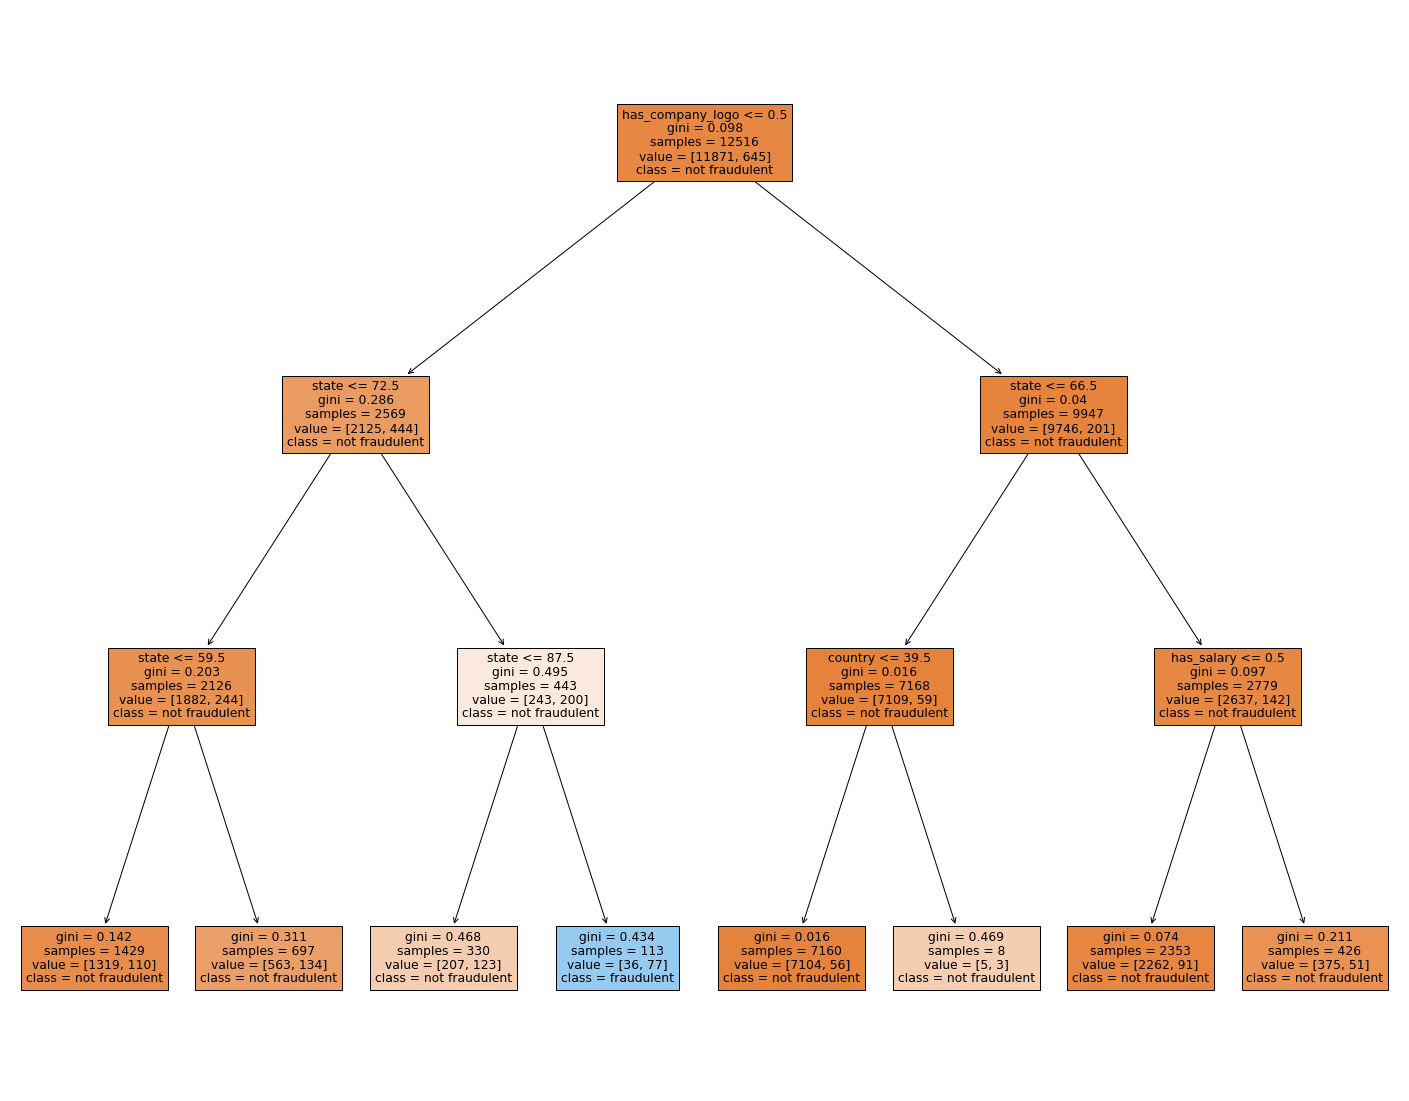

In [247]:
clf0 = DecisionTreeClassifier(max_depth=3)
model = clf0.fit(x_train, y_train)
text_representation = tree.export_text(clf0)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf0, 
                   feature_names=feature_cols,
                   class_names = ['not fraudulent', 'fraudulent'],
                   filled=True)
fig.savefig("decistion_tree.png")

score0_train = clf0.score(x_train, y_train)
score0 = clf0.score(x_test, y_test)
print(score0_train)
print(score0)



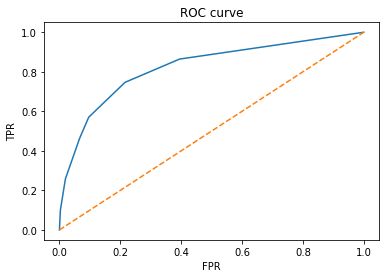

In [248]:
predictions = clf0.predict_proba(x_test)

fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.plot([0,1], [0,1], linestyle='--')
plt.show()

In [249]:
clf1 = RandomForestClassifier()
clf2 = RandomForestClassifier(max_depth=10, random_state=0)
clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)

score1_train = clf1.score(x_train, y_train)
score1 = clf1.score(x_test, y_test)
print(score1_train)
print(score1)

score2_train = clf2.score(x_train, y_train)
score2 = clf2.score(x_test, y_test)
print(score2_train)
print(score2)

0.9634867369766699
0.9619686800894854
0.9602109300095877
0.9642058165548099


*Well!*  
  
In reality, if we were to guess all the postings as non fraudulent, we would get an accuracy of 95.16%. So can we truly say that this model is good?

In [250]:
1 - df[df['fraudulent'] == 1].count()['country']/df.count()['country']

0.9515659955257271

### Synopsis

It seems like we achieve the highest accuracy of prediction with a RF of max depth 10. But that does not mean much given the data that we have.

### Export into csv

In [251]:
df.to_csv(r'../data/clean_fake_job_postings.csv')